In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
import os
os.listdir("/kaggle/input")

['iitg-ai-recruitment-2025-beyond-the-box']

In [13]:
import os
os.listdir("/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box")

['sample_submission.csv',
 'test_atlantis_hidden.csv',
 'atlantis_citizens_final.csv']

In [15]:
df = pd.read_csv(
    "/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv"
)


In [16]:
df.shape

(15751, 10)

In [17]:
df.columns

Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash'],
      dtype='object')

In [19]:
df["commutes_out"] = df["District_Name"] != df["Work_District"]

In [20]:
commute_pct = (
    df.groupby("District_Name")["commutes_out"]
      .mean()
      .sort_values(ascending=False)
)

commute_pct

District_Name
The Golden Reef    0.728747
Coral Slums        0.664747
Deep Trench        0.632666
Mariana Plaza      0.632457
Name: commutes_out, dtype: float64

In [21]:
df[df["commutes_out"] == True] \
  .groupby("Occupation") \
  .size() \
  .sort_values(ascending=False)

Occupation
Merchant    2390
Warrior     2300
Fisher      2179
Miner       2125
Scribe      1533
dtype: int64

The Golden Reef, Coral Slums and Deep Trench are the top districts with commuters. The commuting is also related to the occupation as as merchants(for trade), warriors and fishers(to the fishing regions) commute the most matching real life scenarios.

[](http://)

In [22]:
district_wealth = (
    df.groupby("District_Name")["Wealth_Index"]
      .mean()
      .sort_values()
)

district_wealth

District_Name
Coral Slums         3371.414207
Deep Trench         4806.795825
Mariana Plaza       8535.553804
The Golden Reef    18726.909656
Name: Wealth_Index, dtype: float64

In [23]:
district_wealth.max() / district_wealth.min()

5.554615512839325

The wealthiest district is the Golden Reef and the poorest is Coral Slums (name suggests) and the average citizen in The Golden Reef is ~5.5× wealthier than one in Coral Slums.

In [24]:
df["House_Size_sq_ft"].corr(df["Life_Expectancy"])

0.7977717844528233

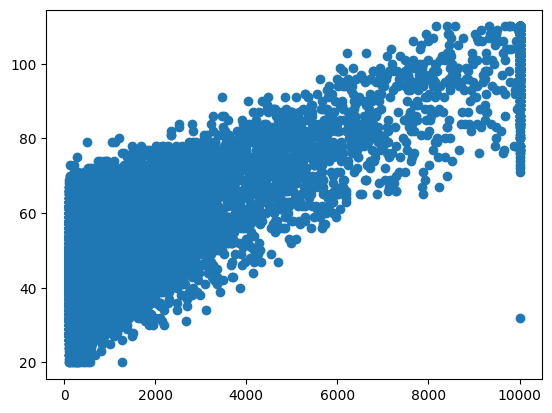

In [25]:
plt.scatter(df["House_Size_sq_ft"], df["Life_Expectancy"])

The trend is clearly upward which shows a strong positive relation between House Size and Life Expectancy (0.7977717844528233 Pearson Correlation). The denser cloud at the left bottom shows many people with small houses have lower life expectancy. The spread at high values shows that house size is a contributer but only among others. 

In [26]:
df.groupby("Diet_Type")["Wealth_Index"].mean().sort_values(ascending=False)

Diet_Type
Exotic Imports    10366.435328
Seafood            9966.829105
Seaweed            8261.324093
Name: Wealth_Index, dtype: float64

Income does affect the dietary intake, with the richer consuming Exotic Imports and the poorer Seaweed with a sort-of scattering of Seafood among both catergories.

In [28]:
pd.crosstab(df["Bio_Hash"], df["Occupation"])

Occupation,Fisher,Merchant,Miner,Scribe,Warrior
Bio_Hash,,,,,
0000aff5,0,0,1,0,0
0002654e,1,0,0,0,0
0004c249,1,0,0,0,0
0007e754,0,0,0,0,1
0009ab53,0,0,0,1,0
...,...,...,...,...,...
fff1df23,0,1,0,0,0
fff450b4,0,0,0,0,1
fff68516,0,0,1,0,0


Each Bio_Hash corresponds uniquely to a single occupation, indicating it is an encoded identifier rather than an independent biological feature. Hence, Bio_Hash should not be treated as a separate predictive variable.

In [29]:
df.groupby("Vehicle_Owned")["commutes_out"].mean()

Vehicle_Owned
Fin Bicycle        0.668853
No Vehicle         0.672218
Royal Submarine    0.716667
Sea Scooter        0.660133
Submarine          0.677406
Name: commutes_out, dtype: float64

The average value of people who own a vehicle commuting outside district for work is 0.68076475 which compared with 0.672218 of people with no vehicle shows that people with no vehicle work outside their district anyways (probably using the Tide Transit) clearly mirroring real life trends.

In [30]:
df.groupby("Occupation")["Wealth_Index"].mean().sort_values(ascending=False)

Occupation
Merchant    18780.172007
Scribe       8400.855990
Warrior      7496.336078
Miner        7454.654064
Fisher       4263.595556
Name: Wealth_Index, dtype: float64

The merchant occupation is the richest compared to fisher which is least wealthiest (again reflecting real life conditions, ironically even the warrior being less paid than scribes).

In [31]:
df["Wealth_Index"].corr(df["Life_Expectancy"])

0.5880947579165875

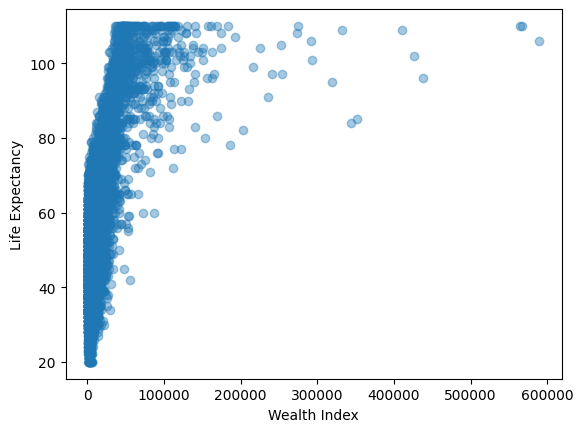

In [32]:
plt.scatter(df["Wealth_Index"], df["Life_Expectancy"], alpha=0.4)
plt.xlabel("Wealth Index")
plt.ylabel("Life Expectancy")
plt.show()

The correlation factor is moderately positive which shows wealth doesn't impact life expectancy alone. What matters is basic needs (food, shelter and clothing) which can be attained at a middle income, which is the reason for steep increase at low income. Beyond a moderate income, wealth doesn't impact lifespan greatly.

In [33]:
df.groupby("District_Name")["Life_Expectancy"].mean().sort_values(ascending=False)

District_Name
The Golden Reef    64.933565
Mariana Plaza      51.851469
Coral Slums        44.307591
Deep Trench        43.758047
Name: Life_Expectancy, dtype: float64

This shows the clear trend of similar groups living together, the richer live together in Golden Reef and poorer together in Coral Slums and Deep Trench (again reflecting real-life scenario).

In [34]:
home_wealth = df.groupby("District_Name")["Wealth_Index"].mean()
work_wealth = df.groupby("Work_District")["Wealth_Index"].mean()

(home_wealth, work_wealth)

(District_Name
 Coral Slums         3371.414207
 Deep Trench         4806.795825
 Mariana Plaza       8535.553804
 The Golden Reef    18726.909656
 Name: Wealth_Index, dtype: float64,
 Work_District
 Coral Slums         7654.171340
 Deep Trench         7549.739588
 Mariana Plaza      11682.292575
 The Golden Reef    11680.909677
 Name: Wealth_Index, dtype: float64)

While Coral Slums and Deep Trench are the poorest residential districts, their corresponding work districts show substantially higher average wealth. This suggests strong economic centralization, where employment opportunities are concentrated in wealthier hubs, forcing residents of poorer districts to commute.

In [35]:
df.groupby("Occupation")["Life_Expectancy"].mean().sort_values()

Occupation
Warrior     40.389443
Fisher      42.960119
Miner       47.877762
Scribe      59.357999
Merchant    69.716696
Name: Life_Expectancy, dtype: float64

This shows that lifespan of riskier occupations like Warrior, Fisher and Miner is lower compared to normal occupations like Scribe and Merchant.